In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("fox5_articles.csv")
G = nx.Graph()

for index, row in df.iterrows():
    topics = [topic.strip() for topic in row["topics"].split(",") if topic.strip() != ""]
    #update an edge in the graph for each topic
    for i in range(len(topics)):
        for j in range(i + 1, len(topics)):
            topic1 = topics[i]
            topic2 = topics[j]
            if G.has_edge(topic1, topic2):
                G[topic1][topic2]["weight"] += 1
            else:
                G.add_edge(topic1, topic2, weight=1)

# centrality
degree_centrality = nx.degree_centrality(G)
pagerank = nx.pagerank(G)

# make df
centrality_df = pd.DataFrame({
    "topic": list(degree_centrality.keys()),
    "degree": list(degree_centrality.values()),
    "pagerank": list(pagerank.values())
})

# top 10 topics by degree centrality
top_topics = centrality_df.nlargest(10, "degree")
print("Top 10 Topics by Degree Centrality:")
print(top_topics)




Top 10 Topics by Degree Centrality:
         topic    degree  pagerank
106     county  0.062500  0.011305
45       trump  0.058594  0.011436
15      flight  0.054688  0.010210
14    security  0.046875  0.008479
49   president  0.042969  0.007562
74      mexico  0.035156  0.007054
0    nationals  0.031250  0.005998
3      workers  0.031250  0.005858
13      amtrak  0.031250  0.005450
19     airport  0.031250  0.005760


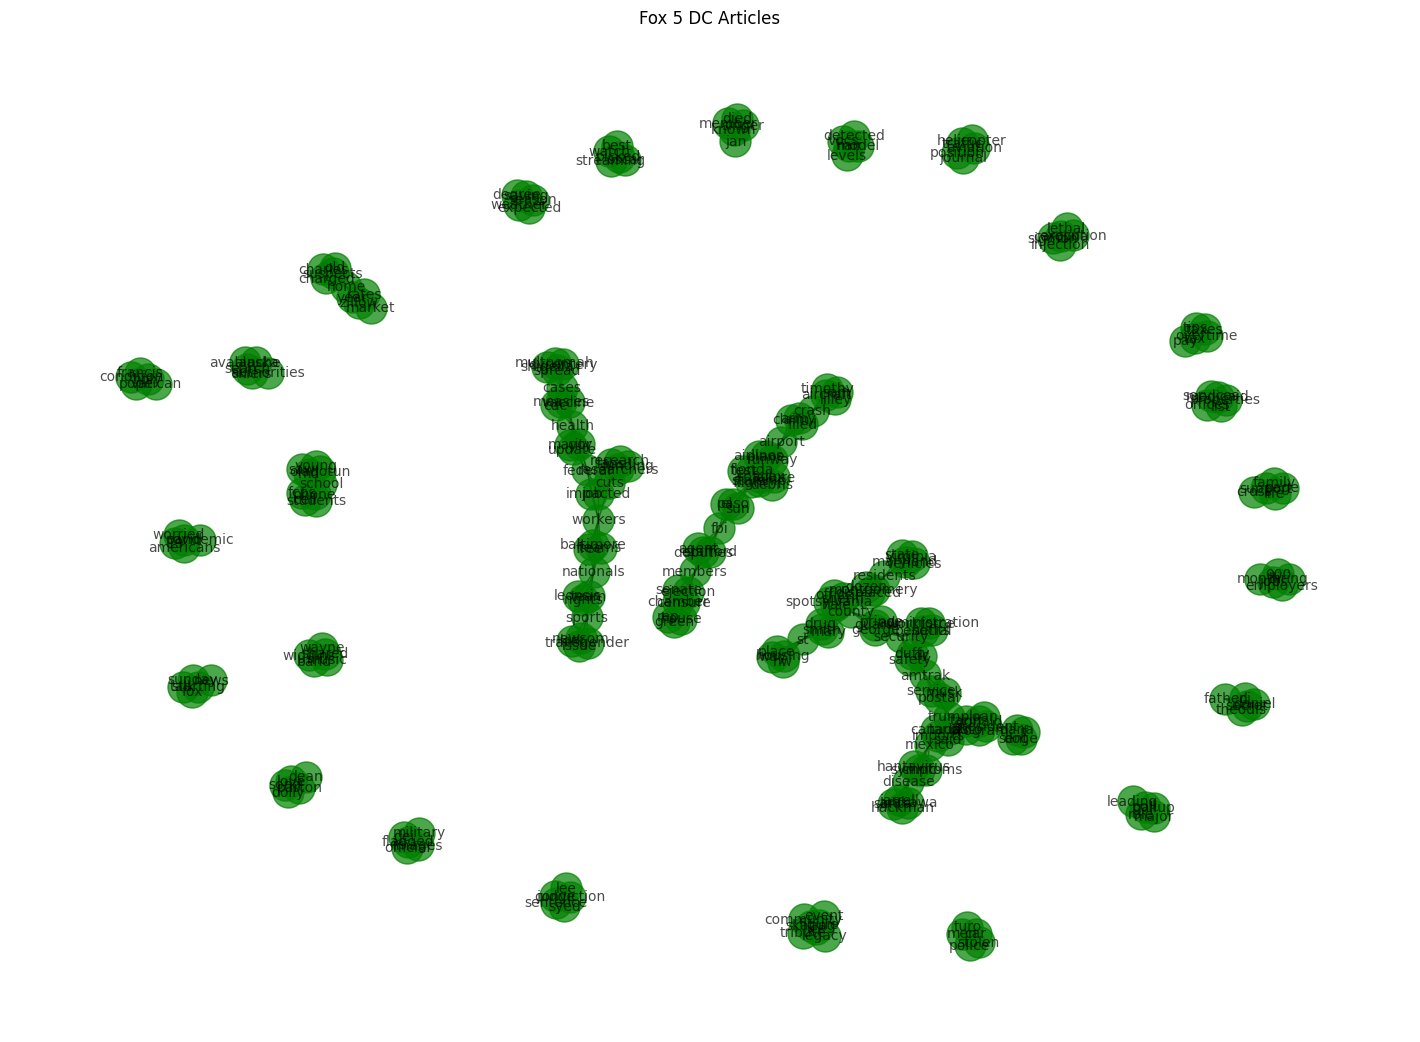

In [15]:
#visual
plt.figure(figsize=(14, 10))
nx.draw(
    G, 
    with_labels=True, 
    node_size=500, 
    font_size=10, 
    font_color="black", 
    node_color="green", 
    alpha=0.7
)
plt.title("Fox 5 DC Articles")
plt.axis("off")
plt.show()

Too many labels and unreadable i will try another visual route

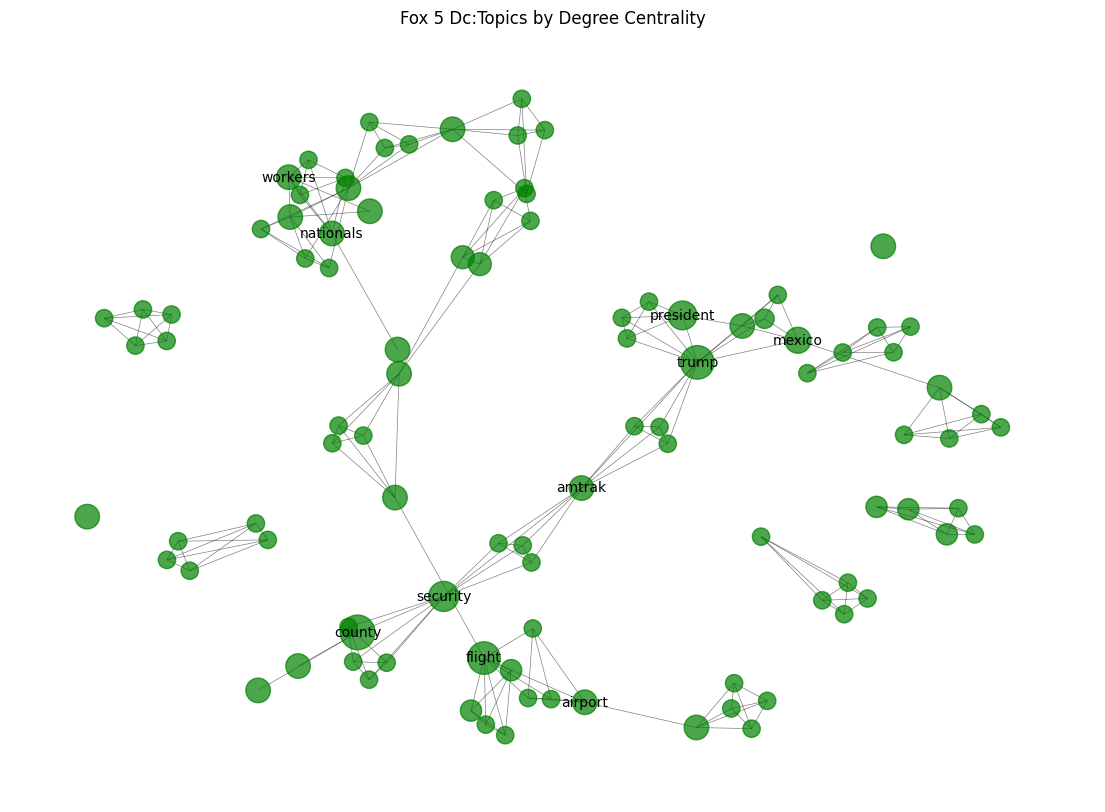

In [14]:
#G_sub and pos
top_100_topics = centrality_df.nlargest(100, "degree")["topic"]
G_sub = G.subgraph(top_100_topics)
pos = nx.spring_layout(G_sub, k=0.3, seed=42)

plt.figure(figsize=(14, 10))

#make nodes larger
node_size = [degree_centrality[node] * 10000 for node in G_sub.nodes()]
nx.draw_networkx_nodes(G_sub, pos, node_size=node_size, node_color='green', alpha=0.7)
nx.draw_networkx_edges(G_sub, pos, alpha=0.5, width=0.5)

#label top 10
top_labels = top_topics["topic"].tolist()
labels = {node: node for node in G_sub.nodes() if node in top_labels}
nx.draw_networkx_labels(G_sub, pos, labels, font_size=10, font_color='black')

plt.title("Fox 5 Dc:Topics by Degree Centrality")
plt.axis("off")
plt.show()